In [1]:
import pandas as pd
import numpy as np

### Declare Dataset

In [2]:
df = pd.read_csv("F:/Portofolio/Olist-Ml/dataset/raw/mart_sales_performance.csv")

In [3]:
df.head(5)

,product_category_name,seller_id,seller_state,seller_city,week_start,total_orders,total_items,total_sales,avg_order_value
0,moveis_decoracao,1554a68530182680ad5c8b042c3ab563,MG,monte siao,2016-08-29 00:00:00.000,1,2,136.23,68.115
1,telefonia,a425f92c199eb576938df686728acd20,PR,curitiba,2016-09-05 00:00:00.000,1,1,75.06,75.060
2,beleza_saude,ecccfa2bb93b34a3bf033cc5d1dcdc69,PR,curitiba,2016-09-12 00:00:00.000,1,3,143.46,47.820
3,bebes,25e6ffe976bd75618accfe16cefcbd0d,SP,sao paulo,2016-09-26 00:00:00.000,1,1,109.34,109.340
4,livros_tecnicos,4be2e7f96b4fd749d52dff41f80e39dd,AC,rio branco,2016-10-03 00:00:00.000,1,1,299.84,299.840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45733 entries, 0 to 45732
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_category_name  45733 non-null  object 
 1   seller_id              45733 non-null  object 
 2   seller_state           45733 non-null  object 
 3   seller_city            45733 non-null  object 
 4   week_start             45733 non-null  object 
 5   total_orders           45733 non-null  int64  
 6   total_items            45733 non-null  int64  
 7   total_sales            45733 non-null  float64
 8   avg_order_value        45733 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.1+ MB


### Preprocessing Stage

#### Switching Dtype

In [5]:
df["week_start"] = pd.to_datetime(df["week_start"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45733 entries, 0 to 45732
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_category_name  45733 non-null  object        
 1   seller_id              45733 non-null  object        
 2   seller_state           45733 non-null  object        
 3   seller_city            45733 non-null  object        
 4   week_start             45733 non-null  datetime64[ns]
 5   total_orders           45733 non-null  int64         
 6   total_items            45733 non-null  int64         
 7   total_sales            45733 non-null  float64       
 8   avg_order_value        45733 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [7]:
print(df["week_start"])

0       2016-08-29
1       2016-09-05
2       2016-09-12
3       2016-09-26
4       2016-10-03
           ...    
45728   2018-08-27
45729   2018-08-27
45730   2018-08-27
45731   2018-08-27
45732   2018-09-03
Name: week_start, Length: 45733, dtype: datetime64[ns]


#### Duplicated Data

In [8]:
df.duplicated().sum()

0

#### NULL Data

In [9]:
df.isnull().sum()

product_category_name    0
seller_id                0
seller_state             0
seller_city              0
week_start               0
total_orders             0
total_items              0
total_sales              0
avg_order_value          0
dtype: int64

#### Data Consistency Check

In [10]:
for col in ["product_category_name"]:
    print(col, ":", df[col].unique())

product_category_name : ['moveis_decoracao' 'telefonia' 'beleza_saude' 'bebes' 'livros_tecnicos'
 'informatica_acessorios' 'cool_stuff' 'ferramentas_jardim' 'market_place'
 'cama_mesa_banho' 'climatizacao' 'telefonia_fixa' 'automotivo'
 'brinquedos' 'fashion_bolsas_e_acessorios' 'utilidades_domesticas'
 'consoles_games' 'relogios_presentes' 'esporte_lazer'
 'livros_interesse_geral' 'perfumaria' 'pet_shop' 'eletronicos' 'Unknown'
 'moveis_escritorio' 'fashion_calcados' 'audio' 'fashion_roupa_feminina'
 'fashion_roupa_masculina' 'fraldas_higiene'
 'industria_comercio_e_negocios' 'alimentos' 'moveis_quarto' 'musica'
 'papelaria' 'eletroportateis' 'eletrodomesticos_2'
 'fashion_underwear_e_moda_praia' 'malas_acessorios' 'moveis_sala'
 'moveis_cozinha_area_de_servico_jantar_e_jardim' 'instrumentos_musicais'
 'casa_conforto_2' 'seguros_e_servicos' 'agro_industria_e_comercio'
 'dvds_blu_ray' 'pcs' 'casa_conforto' 'construcao_ferramentas_construcao'
 'tablets_impressao_imagem' 'construcao_ferr

In [11]:
for col in ["seller_state"]:
    print(col, ":", df[col].unique())

seller_state : ['MG' 'PR' 'SP' 'AC' 'BA' 'CE' 'DF' 'ES' 'MS' 'RJ' 'RS' 'SC' 'PE' 'AM'
 'GO' 'PB' 'SE' 'RN' 'RO' 'MT' 'PA' 'PI' 'MA']


In [12]:
for col in ["seller_city"]:
    print(col, ":", df[col].unique())

seller_city : ['monte siao' 'curitiba' 'sao paulo' 'rio branco' 'ilheus' 'eusebio'
 'brasilia' 'afonso claudio' 'serra' 'araguari' 'belo horizonte'
 'divinopolis' 'sete lagoas' 'tres coracoes' 'uba' 'campo grande'
 'cascavel' 'entre rios do oeste' 'foz do iguacu' 'francisco beltrao'
 'loanda' 'londrina' 'rolandia' 'mage' 'niteroi' 'petropolis'
 'rio de janeiro' 'saquarema' 'bage' 'carazinho' 'santo angelo'
 'santo antonio da patrulha' 'sao leopoldo' 'blumenau' 'canoinhas' 'icara'
 'joinville' 'timbo' 'tubarao' 'barretos' 'barueri' 'bauru'
 'bom jesus dos perdoes' 'braganca paulista' 'campinas' 'capivari'
 'catanduva' 'descalvado' 'echapora' 'franca' 'guaratingueta' 'guarulhos'
 'ibitinga' 'igaracu do tiete' 'indaiatuba' 'itaquaquecetuba' 'limeira'
 'marilia' 'mogi das cruzes' 'mogi guacu' 'osasco' 'pedreira' 'pompeia'
 'porto ferreira' 'ribeirao preto' 'santa maria da serra' 'santos'
 'sao caetano do sul' 'sao jose do rio pardo' 'sao jose do rio preto'
 'sorocaba' 'suzano' 'tiete' 'vot

#### Business Logic

In [13]:
df[['total_orders', 'total_items', 'total_sales', 'avg_order_value']].describe()


,total_orders,total_items,total_sales,avg_order_value
count,45733.000000,45733.00000,45733.000000,45733.000000
mean,2.191262,2.46321,346.435905,159.270901
std,3.310494,3.88143,673.306975,231.589079
min,1.000000,1.00000,9.590000,6.080000
25%,1.000000,1.00000,78.700000,58.100000
50%,1.000000,1.00000,159.100000,98.090000
75%,2.000000,2.00000,346.470000,170.695000
max,171.000000,216.00000,53672.510000,6929.310000


Pada dataset e-commerce Olist, perbedaan karakteristik penjual sangat wajar terjadi. Misalnya:

* **Seller A** menjual produk murah (contoh: aksesoris kecil), sehingga nilai `avg_order_value` dan `total_sales` relatif rendah.
* **Seller B** menjual produk bernilai tinggi (contoh: furniture, elektronik), sehingga nilai `total_sales` jauh lebih besar.

Perbedaan tersebut menghasilkan **outlier alami**, yang biasa terdapat pada platform e-commerce. Oleh karena itu, outlier tidak dihapus, melainkan ditangani dengan **transformasi skala** agar tidak mendominasi proses clustering.

##### 1. Log Transform
Metode pertama adalah **Log Transform** dengan rumus:

$$
x' = \log(1 + x)
$$

Transformasi ini mengecilkan nilai yang sangat besar, sementara nilai kecil relatif tidak banyak berubah. Contoh:

| total\_sales | setelah log1p |
| ------------ | ------------- |
| 100          | 4.61          |
| 500          | 6.22          |
| 10.000       | 9.21          |
| 50.000       | 10.82         |

Dengan cara ini, variasi seller besar tetap terjaga, namun tidak lagi terlalu mendominasi.

##### 2. Standard Scaler

Setelah melakukan log transform, data biasanya masih memiliki **rentang skala yang berbeda-beda antar fitur**.
Contoh:

* `total_orders` bisa saja berkisar 1–200
* `avg_order_value` (setelah log) bisa berkisar 4–11

Perbedaan skala ini dapat membuat algoritma clustering seperti K-Means bias terhadap fitur dengan nilai lebih besar.
Untuk itu digunakan **StandardScaler**, yang mengubah setiap fitur menjadi distribusi dengan **mean = 0** dan **standard deviation = 1**:

$$
z = \frac{x - \mu}{\sigma}
$$



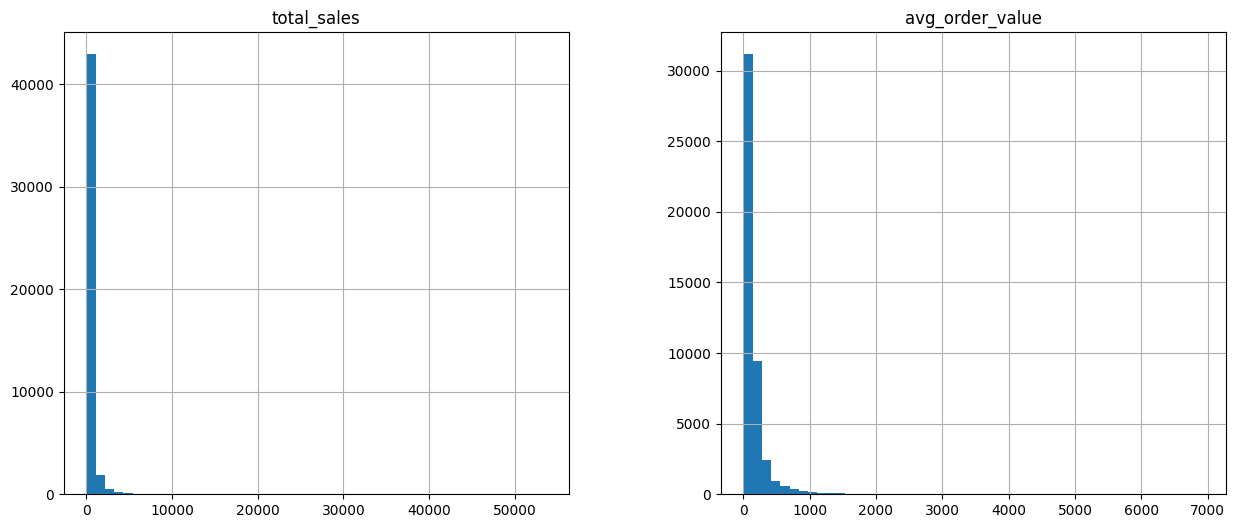

In [14]:
import matplotlib.pyplot as plt

df[['total_sales', 'avg_order_value']].hist(bins=50, figsize=(15, 6))
plt.show()

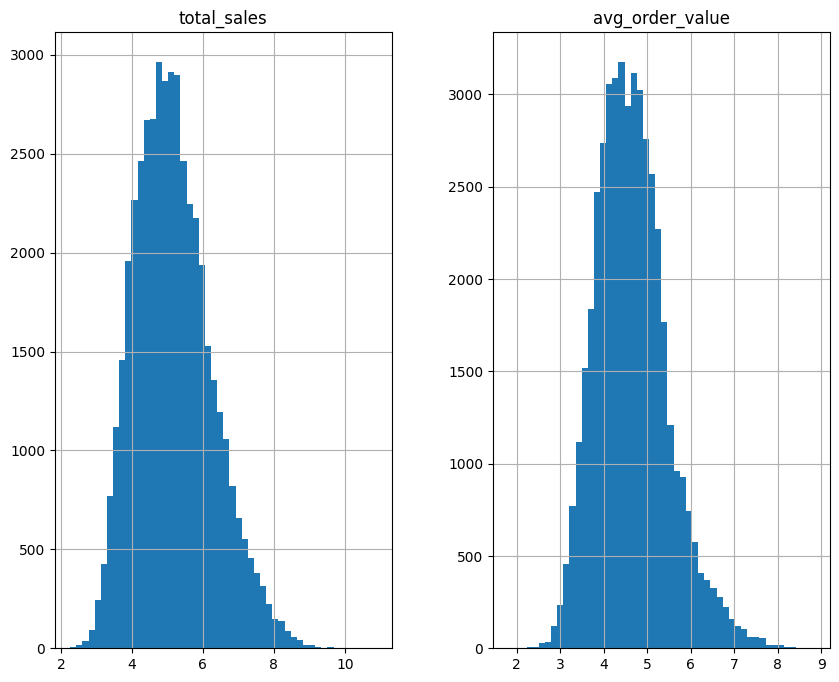

In [15]:
log_data = np.log(df[['total_sales', 'avg_order_value']])

log_data.hist(bins=50, figsize=(10, 8))
plt.show()


In [16]:
# Sebelum implement log transform
print(df[['total_sales', 'avg_order_value']])

       total_sales  avg_order_value
0           136.23           68.115
1            75.06           75.060
2           143.46           47.820
3           109.34          109.340
4           299.84          299.840
...            ...              ...
45728        71.18           71.180
45729       178.25          178.250
45730        87.62           87.620
45731        73.17           24.390
45732       166.46          166.460

[45733 rows x 2 columns]


In [17]:
# Sesudah implement log transform
print(log_data)

       total_sales  avg_order_value
0         4.914345         4.221197
1         4.318288         4.318288
2         4.966056         3.867444
3         4.694462         4.694462
4         5.703249         5.703249
...            ...              ...
45728     4.265212         4.265212
45729     5.183187         5.183187
45730     4.473009         4.473009
45731     4.292786         3.194173
45732     5.114755         5.114755

[45733 rows x 2 columns]


### Set log data + selected features into csv

In [28]:
import pandas as pd
import numpy as np

# Ambil kolom yang sudah di-log
log_data = np.log(df[['total_sales', 'avg_order_value']])

# Selected features 
selected_features = df[['seller_state', 'product_category_name', 'total_orders', 'total_items']]

df_feature = pd.concat([selected_features, log_data], axis=1)

print(df_feature)

      seller_state                           product_category_name  \
0               MG                                moveis_decoracao   
1               PR                                       telefonia   
2               PR                                    beleza_saude   
3               SP                                           bebes   
4               AC                                 livros_tecnicos   
...            ...                                             ...   
45728           SP                           utilidades_domesticas   
45729           SP                              relogios_presentes   
45730           SP                                      perfumaria   
45731           SP                                   esporte_lazer   
45732           SP  moveis_cozinha_area_de_servico_jantar_e_jardim   

       total_orders  total_items  total_sales  avg_order_value  
0                 1            2     4.914345         4.221197  
1                 1          

In [35]:
import os
print(os.getcwd())

df_feature.to_csv("../dataset/processed/state_cluster_data.csv", index=False)

f:\Portofolio\Olist-Ml\notebooks
